In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

diabete = pd.read_csv("E:/AXEL/UPEM/Compétences/Kaggle/Diabetes Prediction/diabetes_prediction_dataset.csv")
diabete

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [112]:
df = diabete.copy()

## Traitement des données

In [113]:
#NaN
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [114]:
# Retirer ligne ou il y a "other"
df = df[df['gender'] != 'Other']
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [115]:
# dataset rassemblant seulement les personnes diabétiques
diabete_ON = df[df['diabetes'] != 0]
diabete_ON

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


In [116]:
# dataset rassemblant seulement les personnes non diabétiques 
diabete_OFF = df[df['diabetes'] != 1]
diabete_OFF

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Encodage

In [117]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [118]:
#smoking_history
num_encodage = 0
for name in df['smoking_history'].unique() :
    df['smoking_history'] = df['smoking_history'].replace(name,num_encodage)
    num_encodage += 1
    
df    

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,0,25.19,6.6,140,0
1,Female,54.0,0,0,1,27.32,6.6,80,0
2,Male,28.0,0,0,0,27.32,5.7,158,0
3,Female,36.0,0,0,2,23.45,5.0,155,0
4,Male,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,1,27.32,6.2,90,0
99996,Female,2.0,0,0,1,17.37,6.5,100,0
99997,Male,66.0,0,0,3,27.83,5.7,155,0
99998,Female,24.0,0,0,0,35.42,4.0,100,0


In [119]:
#gender
df['gender'] = df['gender'].replace('Male', 0)
df['gender'] = df['gender'].replace('Female', 1)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,0,25.19,6.6,140,0
1,1,54.0,0,0,1,27.32,6.6,80,0
2,0,28.0,0,0,0,27.32,5.7,158,0
3,1,36.0,0,0,2,23.45,5.0,155,0
4,0,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,1,27.32,6.2,90,0
99996,1,2.0,0,0,1,17.37,6.5,100,0
99997,0,66.0,0,0,3,27.83,5.7,155,0
99998,1,24.0,0,0,0,35.42,4.0,100,0


In [120]:
#Aperçu des données NUMERIQUES
df.describe().style.format("{:.2f}")

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.00,99982.00,99982.00,99982.00,99982.00,99982.00,99982.00,99982.00,99982.00
mean,0.59,41.89,0.07,0.04,1.31,27.32,5.53,138.06,0.09
std,0.49,22.52,0.26,0.19,1.45,6.64,1.07,40.71,0.28
min,0.00,0.08,0.00,0.00,0.00,10.01,3.50,80.00,0.00
25%,0.00,24.00,0.00,0.00,0.00,23.63,4.80,100.00,0.00
50%,1.00,43.00,0.00,0.00,1.00,27.32,5.80,140.00,0.00
75%,1.00,60.00,0.00,0.00,2.00,29.58,6.20,159.00,0.00
max,1.00,80.00,1.00,1.00,5.00,95.69,9.00,300.00,1.00


## Datavisualisation

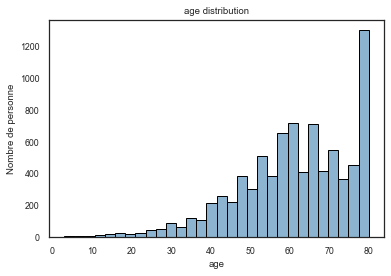

In [121]:
plt.hist(diabete_ON['age'], bins=30, edgecolor='black')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Nombre de personne')
plt.show()
#On voit que chez les diabétiques l'âge à une grande influence

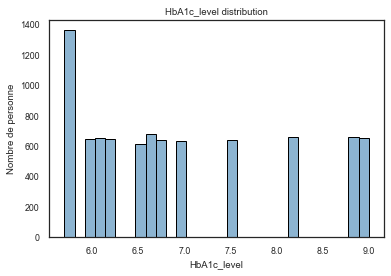

In [122]:
# Histogramme en fonction des features

plt.hist(diabete_ON['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c_level distribution')
plt.xlabel('HbA1c_level')
plt.ylabel('Nombre de personne')
plt.show()
# On ne peut pas tirer de conclusion si on ne connait pas les seuils d'une personne "normal"

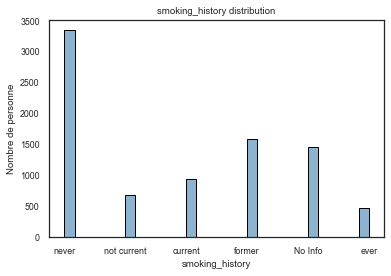

In [123]:
plt.hist(diabete_ON['smoking_history'], bins=30, edgecolor='black')
plt.title('smoking_history distribution')
plt.xlabel('smoking_history')
plt.ylabel('Nombre de personne')
plt.show()

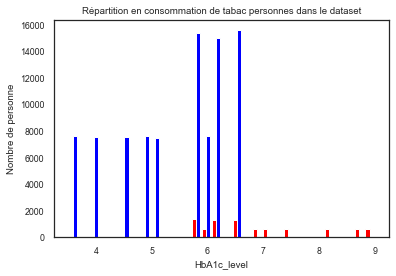

In [124]:
# Histogramme en fonction des features comparer les diabetiques et non diabetiques

plt.hist([diabete_ON['HbA1c_level'],diabete_OFF['HbA1c_level']], bins=30, color=['red', 'blue'])
plt.title('Répartition en consommation de tabac personnes dans le dataset')
plt.xlabel('HbA1c_level')
plt.ylabel('Nombre de personne')
plt.show()

#On observe bien que HbA1c_level influe sur le diabete

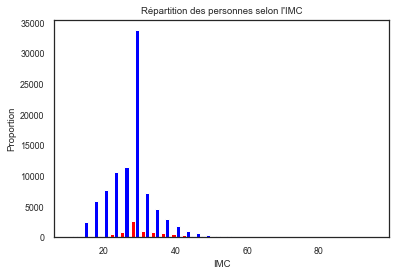

In [125]:
plt.hist([diabete_ON['bmi'],diabete_OFF['bmi']], bins=30, color=['red', 'blue'])
plt.title("Répartition des personnes selon l'IMC")
plt.xlabel('IMC')
plt.ylabel('Proportion')
plt.show()

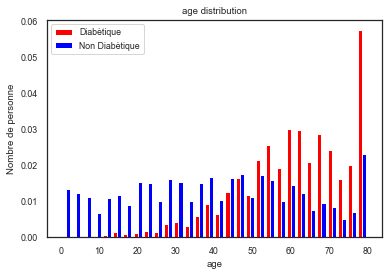

In [126]:
#Tracer avec une proportion, au lieu de count -> permet de mieux visualier car on a 90% de non diabetique contre 10% diabetique dans le dataset

plt.hist([diabete_ON['age'],diabete_OFF['age']], bins=30,density=True, color=['red', 'blue'])
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('Nombre de personne')
plt.legend(['Diabètique', 'Non Diabètique'], loc='upper left')
plt.show()

## Matrice corrélation

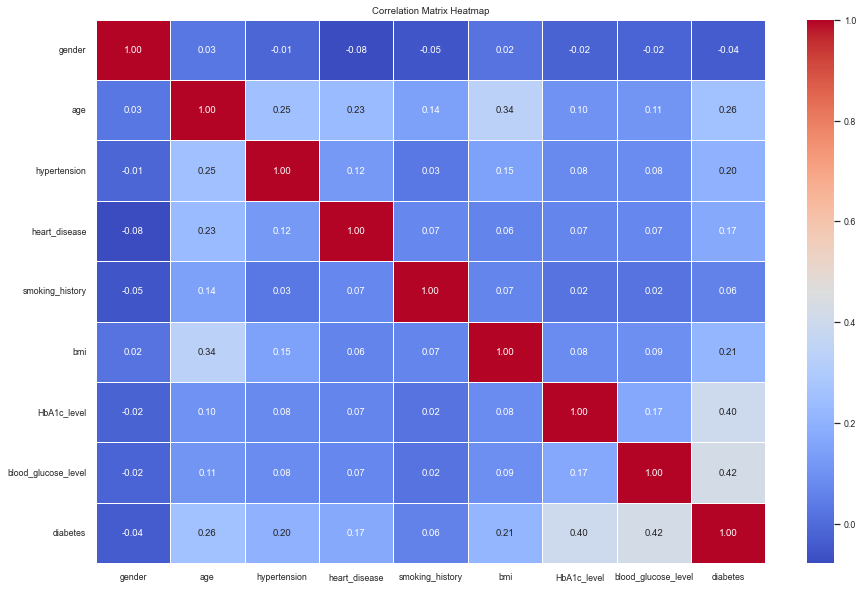

In [127]:
#Montre l'influence de chaque parametre les uns avec les autres 

correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.set(font_scale=0.8)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

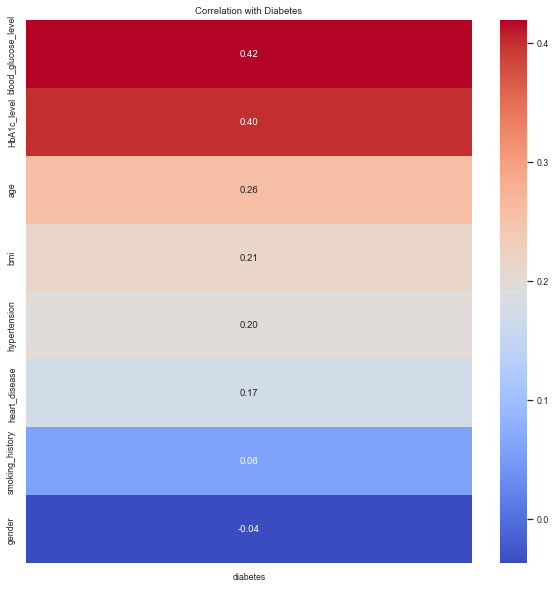

In [128]:
#Dans notre cas c'est la ligne du diabete qui nous interesse
# heatmap avec seulement la colonne diabete
corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)
plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [129]:
df_selection_features = df.drop (['gender', 'smoking_history'], axis = 1)
df_selection_features

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,0,1,25.19,6.6,140,0
1,54.0,0,0,27.32,6.6,80,0
2,28.0,0,0,27.32,5.7,158,0
3,36.0,0,0,23.45,5.0,155,0
4,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0
99996,2.0,0,0,17.37,6.5,100,0
99997,66.0,0,0,27.83,5.7,155,0
99998,24.0,0,0,35.42,4.0,100,0


## Machine Learning

In [130]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop("diabetes",axis=1) # features : matrice
y = df['diabetes'] # target : vecteur

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=94) # 5 blocs 20% - 80% apprentissage

print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (79985, 8)
X test:  (19997, 8)
y train:  (79985,)
y test:  (19997,)


In [131]:
import time

start_time = time.time()

rf = RandomForestClassifier(random_state = 94) 
rf.fit(X_train,y_train) 

end_time = time.time()
execution_time = end_time - start_time
print("Temps d'éxectution du modèle :",execution_time)

y_pred = rf.predict(X_test)

print(f"Score accuracy : {accuracy_score(y_test, y_pred)}")


Temps d'éxectution du modèle : 4.964657783508301
Score accuracy : 0.9706455968395259


In [132]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2],
    'random_state' : [94]
}


grid = GridSearchCV(rf, param_grid, scoring='accuracy', cv=5) 

grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}") 
print(f"Best Parameters: {grid.best_params_}")

Accuracy Score: 0.9721958293744062
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 94}


## Matrice de confusion

[[18263     2]
 [  554  1178]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18265
           1       1.00      0.68      0.81      1732

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997



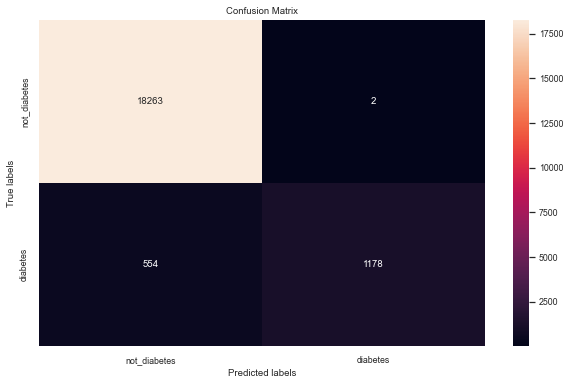

In [141]:
# Matrice de Confusion  : Vrai Negatif / Faux Positif
#                         Faux Naegatif / Vrai Positif 
 

cm = confusion_matrix(y_test,y_pred) # matrice de confusion
plt.figure(figsize=(10, 6))
print(cm)
print(classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not_diabetes','diabetes']); ax.yaxis.set_ticklabels(['not_diabetes','diabetes']);

In [142]:
cm[0,1]

2

In [143]:
#Accuracy = 1 -> toutes les prédictions sont bonnes
# lorsque le nombre de True Positive et de True Negative sont les plus important.

Accuracy = (cm[1,1] + cm[0,0])/y_test.shape[0]
print("Accuracy: {} ".format(Accuracy))

Accuracy: 0.9721958293744062 


In [144]:
# Précision si FN couteux : c'est le cas dans le milieu médical
# lorsque le nombre de False Positive est le plus élevé.

Précision = cm[0,0] /(cm[0,0]+cm[1,0])
print("Précision: {} ".format(Précision))

Précision: 0.9705585374926928 


In [146]:
# Sensibilité si FP couteux (RECALL)
# lorsque le nombre de False Negative est le plus important.

Sensibilité = cm[1,1] /(cm[1,1]+cm[1,0])
print("Sensibilité: {} ".format(Sensibilité))

Sensibilité: 0.6801385681293303 


In [137]:
#F1-Score

F1_score = 2*((Précision*Sensibilité)/(Précision+Sensibilité))
print("F1-Score: {} ".format(F1_score))

F1-Score: 0.9850062024702011 


In [153]:
#Par défaut le seuil est 0.5

proba_1 = grid.predict_proba(X_test)[:, 1] #si le nombre est supérieur au seuil, le modèle prédit 1 sinon 0

In [154]:
proba_1

array([0.05794333, 0.03071516, 0.03560488, ..., 0.00966035, 0.03774824,
       0.00102263])

In [174]:
seuil = 0.2
y_pred_threshold = (proba_1 >= seuil) #True si proba_1 supérieur au seuil -> 1 
y_pred_threshold = y_pred_threshold.astype(int) # Conversion des probabilités en 0 ou 1 

In [175]:
y_pred_threshold

array([0, 0, 0, ..., 0, 0, 0])

[[17973   292]
 [  406  1326]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18265
           1       0.82      0.77      0.79      1732

    accuracy                           0.97     19997
   macro avg       0.90      0.87      0.89     19997
weighted avg       0.96      0.97      0.96     19997



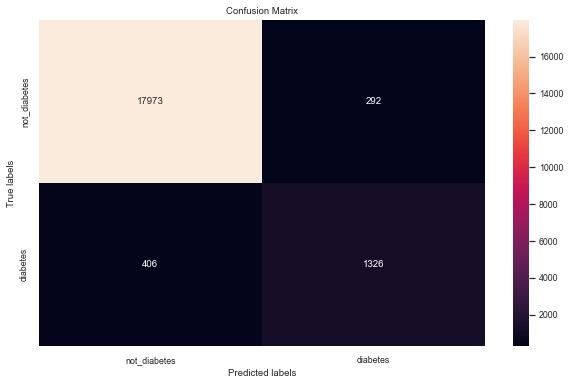

In [176]:
cm = confusion_matrix(y_test,y_pred_threshold) # matrice de confusion
plt.figure(figsize=(10, 6))
print(cm)
print(classification_report(y_test, y_pred_threshold))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not_diabetes','diabetes']); ax.yaxis.set_ticklabels(['not_diabetes','diabetes']);

In [177]:
X = df_selection_features.drop("diabetes",axis=1) 
y = df_selection_features['diabetes'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=94)

In [181]:
rf_selection = RandomForestClassifier(max_depth =  10, min_samples_leaf = 1, min_samples_split = 10, n_estimators = 50, random_state = 94) 
rf_selection.fit(X_train,y_train) 

y_pred_selection = rf_selection.predict(X_test)
print(f"Score accuracy : {accuracy_score(y_test, y_pred_selection)}")

Score accuracy : 0.9723958593789068


In [184]:
proba_1_selection = rf_selection.predict_proba(X_test)[:, 1]
y_pred_threshold_select = (proba_1_selection >= 0.2).astype(int) 

[[17812   453]
 [  362  1370]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18265
           1       0.75      0.79      0.77      1732

    accuracy                           0.96     19997
   macro avg       0.87      0.88      0.87     19997
weighted avg       0.96      0.96      0.96     19997



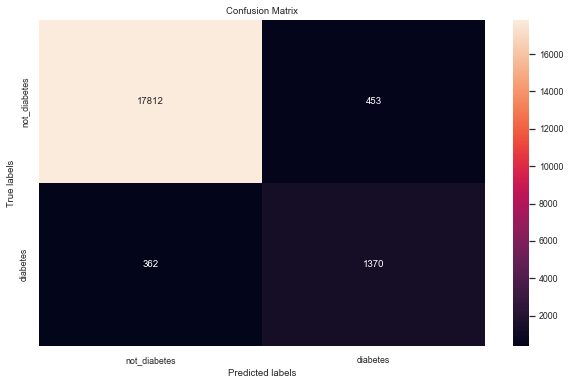

In [185]:
cm = confusion_matrix(y_test,y_pred_threshold_select) 
plt.figure(figsize=(10, 6))
print(cm)
print(classification_report(y_test, y_pred_threshold_select))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not_diabetes','diabetes']); ax.yaxis.set_ticklabels(['not_diabetes','diabetes']);